# Proyecto 1 - NLP

## Revision de ___ en comentarios de libros 

#### Importación de librerias

In [5]:
import pandas as pd
import seaborn as sns

#### Importación de datos

In [3]:
data = pd. read_csv('data/reviews.csv')

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982615,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982617,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600


#### Preparación e los datos

1. Se se paro la columna helpfull en dpos columnas. Las veces que se le dio helpfull postivo, y las veces totales que se le ha dado helpful

In [41]:
data['Helpful Total'] = data['helpful'].str.replace("[","")
data['Helpful Total'] = data['Helpful Total'].str.replace("]","")
separacion = data['Helpful Total'].str.split(",",expand=True)
data['Helpful Total']=separacion[1].astype(int)
data['Helpful Positivo']=separacion[0].astype(int)
data

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful Total,Helpful Positivo,Helpful Rate
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2,2,1.0
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2,2,1.0
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1,1,1.0
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1,0,0.0
7,7,B000F83SZQ,"[1, 1]",4,Never heard of Amy Brewster. But I don't need ...,"03 22, 2014",A3DE6XGZ2EPADS,WPY,Enjoyable reading and reminding the old times,1395446400,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982612,982612,B00M13FNSS,"[2, 2]",4,Dre is quite possibly the worst character I h...,"07 23, 2014",A76D0PDO97IIJ,Amazon Customer,Dre is quite possibly the worst character I ha...,1406073600,2,2,1.0
982613,982613,B00M13FNSS,"[2, 2]",5,This book was amazing. It was definitely worth...,"07 23, 2014",A23VHARP9XPOXI,CamilleJoy712,EVEYTHING definite 5 star read,1406073600,2,2,1.0
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600,2,2,1.0
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600,1,1,1.0


2. Se omiteron los regitso que no han sido calificados helpfull ninguna vezy se calculo la tasa de positividad

In [36]:
# Filtar los reviws que no han sido clasificados como helpful
data = data[data["Helpful Total"] >0 ]
data['Helpful Rate'] = data['Helpful Positivo']/data['Helpful Total']
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful Total,Helpful Positivo,Helpful Rate
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2,2,1.0
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2,2,1.0
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1,1,1.0
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1,0,0.0
7,7,B000F83SZQ,"[1, 1]",4,Never heard of Amy Brewster. But I don't need ...,"03 22, 2014",A3DE6XGZ2EPADS,WPY,Enjoyable reading and reminding the old times,1395446400,1,1,1.0


#### Análisis de los datos

 Distribución de la tasa de postividad en helpfull

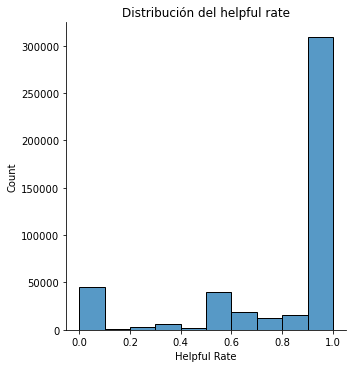

In [39]:
sns.displot(data["Helpful Rate"],bins = 10).set(title="Distribución del helpful rate");

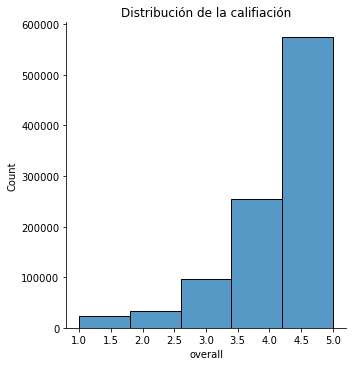

In [7]:
sns.displot(data["overall"],bins=5).set(title="Distribución de la califiación");